In [1]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv(r'C:\henry_Chang\final_project\model\data\ML_total_industry_lastest_v4.csv')

In [13]:
df1.columns

Index(['company_id', 'company_name', 'year', 'pre_tax_income',
       'income_tax_expense', 'cont_oper_IL', 'discont_oper_IL', 'profit',
       'parent_PL', 'jointly_control_PL', 'non_control_PL',
       'earning_per_share', 'total_assets', 'total_liabilities', 'stocks',
       'capital_reserve', 'retained_earnings', 'other_equity_interest',
       'treasury_stock', 'parent_equity', 'control_interest',
       'non_control_interest', 'total_equity', 'proceeds_issued',
       'total_treasury_shares', 'book_value_per_share', 'cash_dividend',
       'stock_dividend', 'dividend_value', 'all_dividend'],
      dtype='object')

In [ ]:
df1.shape

In [ ]:
(df1['stock_dividend']>0).sum()

## 相關矩陣

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cols = df1.columns[3:]

In [17]:
cols

Index(['pre_tax_income', 'income_tax_expense', 'cont_oper_IL',
       'discont_oper_IL', 'profit', 'parent_PL', 'jointly_control_PL',
       'non_control_PL', 'earning_per_share', 'total_assets',
       'total_liabilities', 'stocks', 'capital_reserve', 'retained_earnings',
       'other_equity_interest', 'treasury_stock', 'parent_equity',
       'control_interest', 'non_control_interest', 'total_equity',
       'proceeds_issued', 'total_treasury_shares', 'book_value_per_share',
       'cash_dividend', 'stock_dividend', 'dividend_value', 'all_dividend'],
      dtype='object')

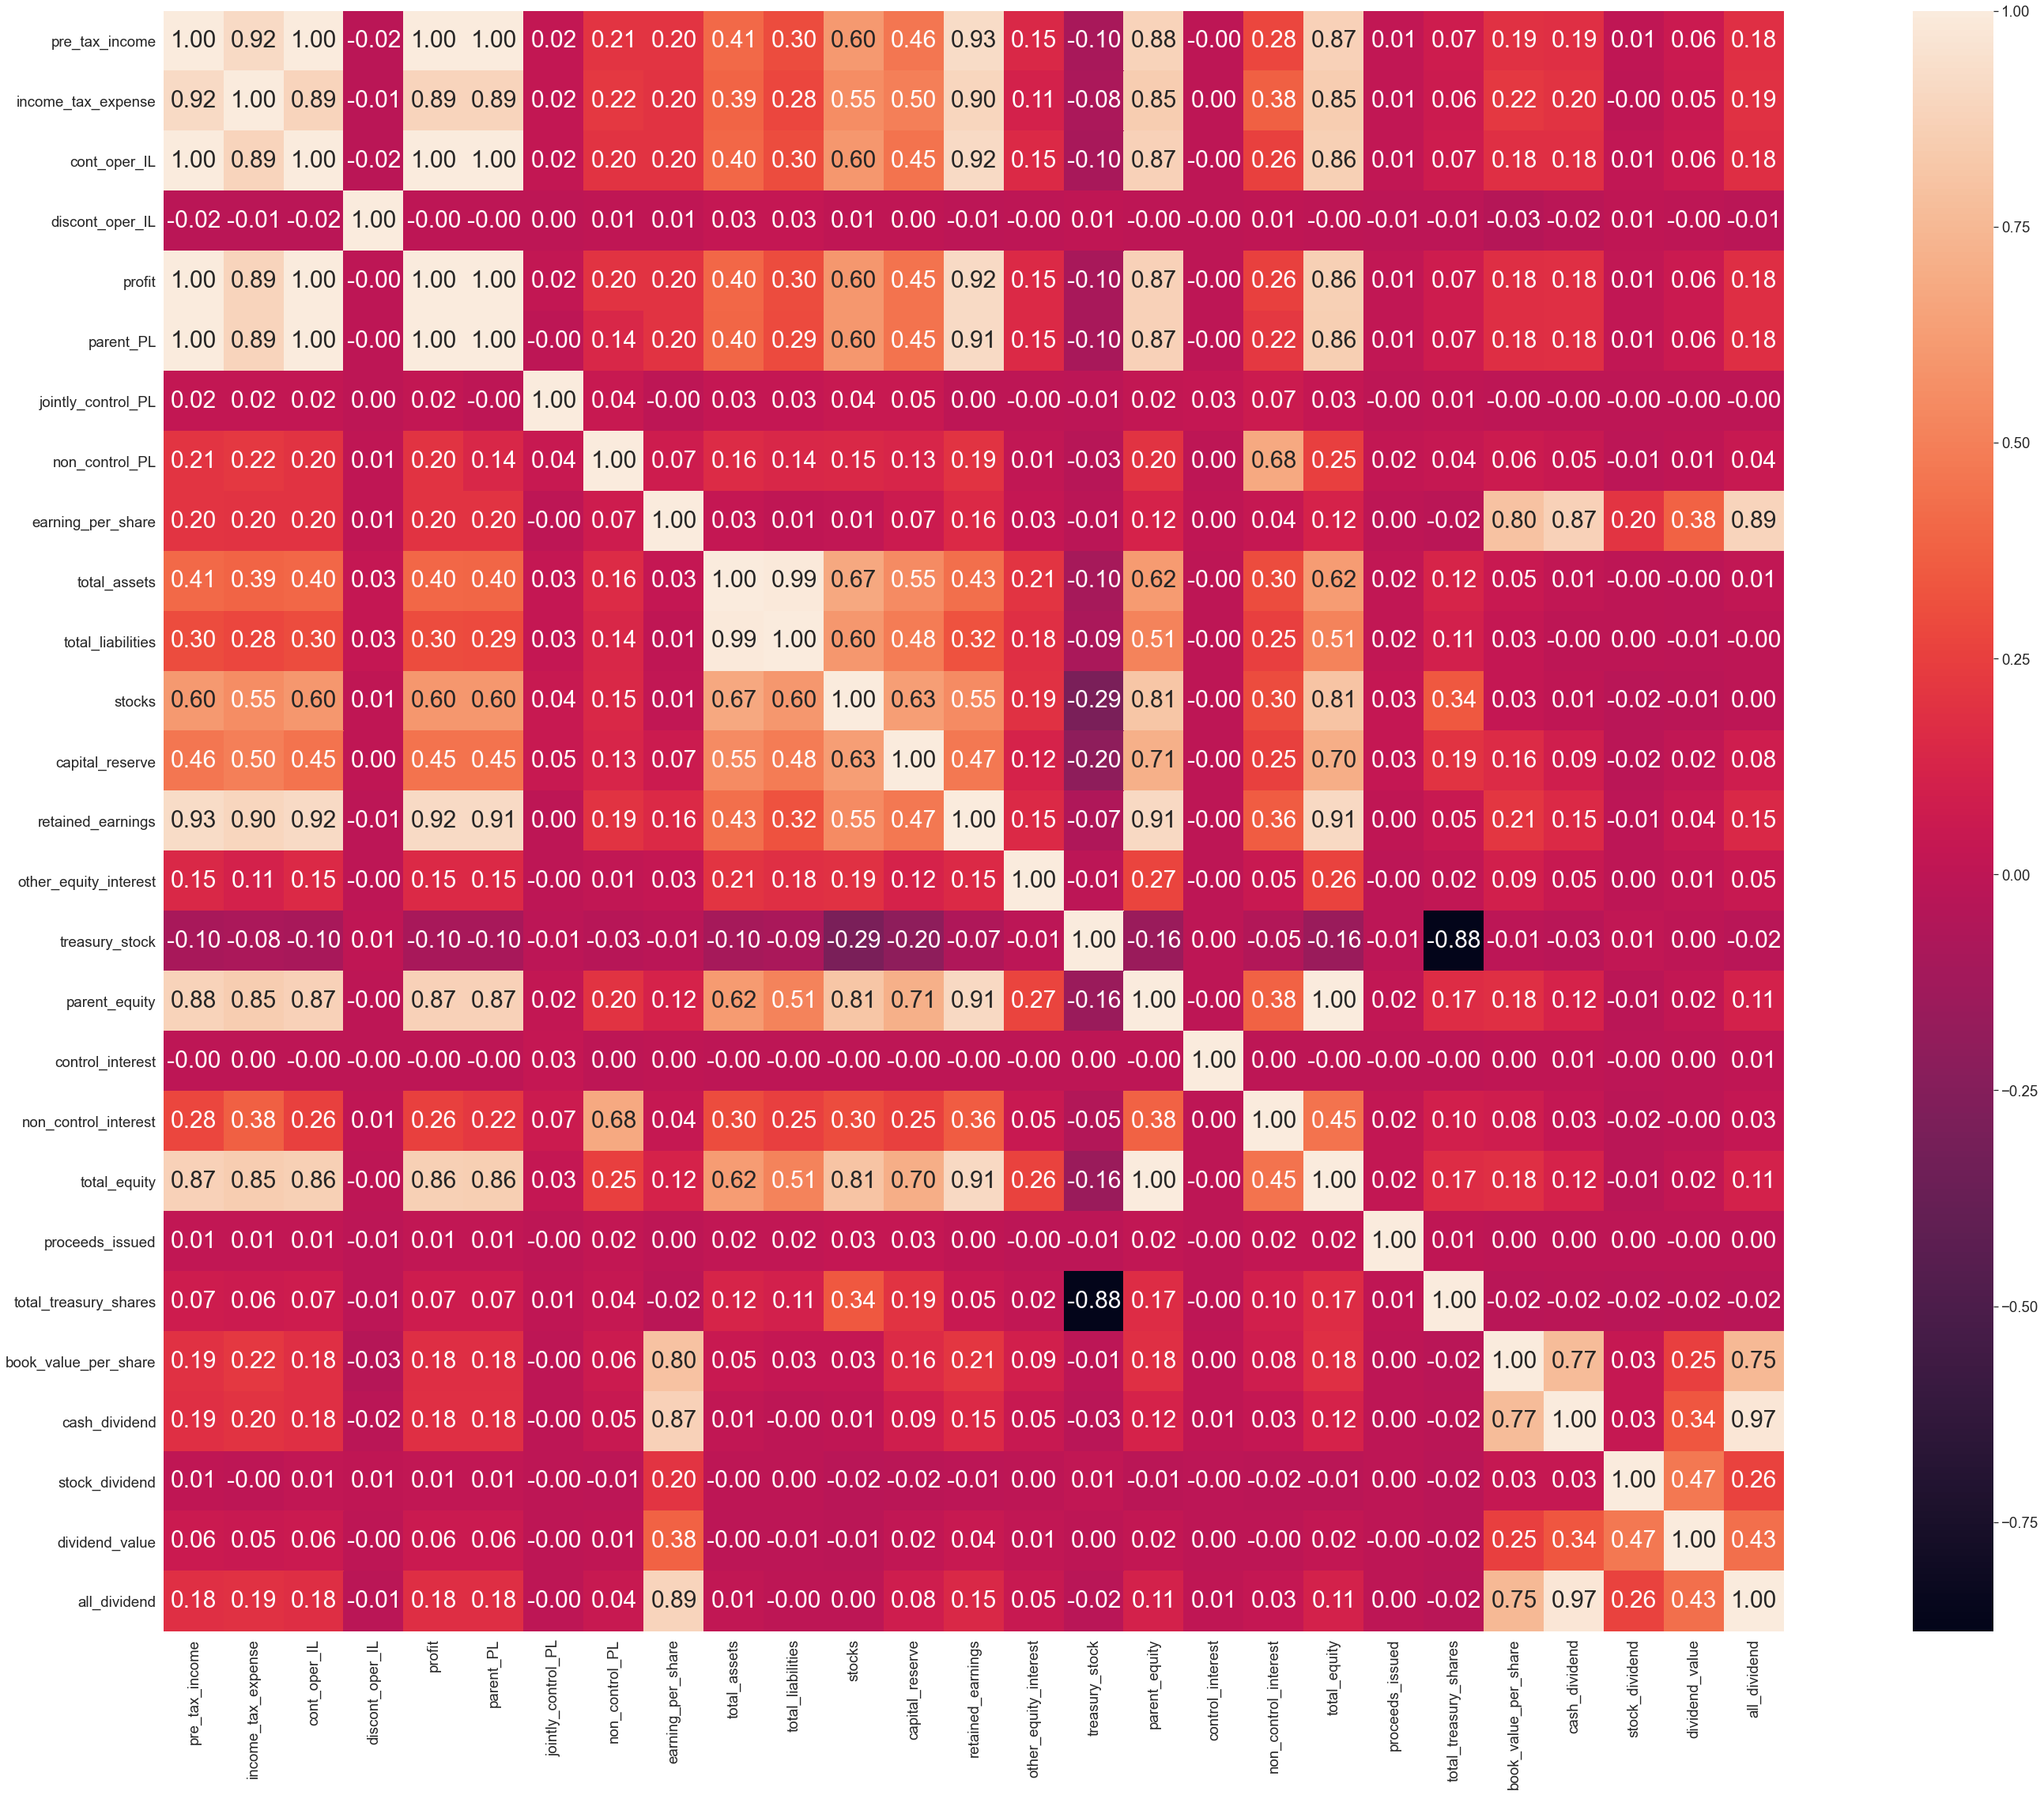

In [16]:
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.7)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout(rect=(0,0,8,8))

plt.show()

## 將數據集分為訓練用跟測試用

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
seed=42

In [ ]:
df1.iloc[:,[11,25]]

In [20]:
X = df1.iloc[:,3:26].values #特徵值為3-25
y_cash = df1['cash_dividend'].values  #標籤是cash_dividend
y_stock = df1['stock_dividend'].values  #標籤是stock_dividend
y_value = df1['dividend_value'].values  #標籤是dividend_value
y_dividend = df1['all_dividend'].values  #標籤是all_dividend = cash_dividend+stock_dividend

In [21]:
from sklearn.preprocessing import StandardScaler
#建立StandardScaler物件
sc = StandardScaler()
# 資料標準化
X_std = sc.fit_transform(X)

In [22]:
# y_cash
X_train, X_test, y_cash_train, y_cash_test =  train_test_split(X_std, y_cash,test_size=0.30,random_state=seed)

In [25]:
# y_dividend
X_train, X_test, y_dividend_train, y_dividend_test =  train_test_split(X_std, y_dividend,test_size=0.30,random_state=seed)

## 取得特徵值

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([3.94283976e-01, 9.87451277e-02, 7.65712332e-02, 6.71047691e-02,
       6.12476581e-02, 5.29631735e-02, 4.94989677e-02, 4.63386861e-02,
       4.10413565e-02, 3.79731636e-02, 2.38446315e-02, 1.60535242e-02,
       1.26889368e-02, 7.49318499e-03, 5.12291438e-03, 4.89339119e-03,
       4.13525983e-03, 4.55715072e-08, 8.48765537e-11, 5.38696178e-11,
       9.49245385e-33, 4.68971846e-33, 3.01615869e-34])

## 列出並排序全部的特徵值

In [29]:
import matplotlib.pyplot as plt
import numpy as np

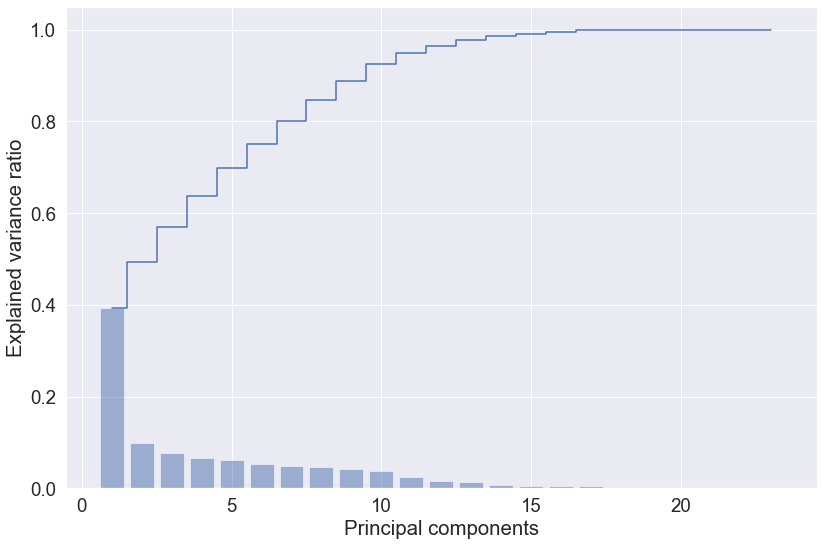

In [41]:
plt.bar(range(1, 24), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 24), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.tight_layout(rect=(0,0,2,2))

plt.show()

## 列出前兩名的主成份特徵值

In [44]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

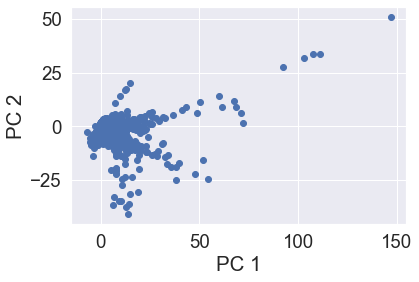

In [45]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## 以管線來簡化流程

In [47]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
# y_cash
slr = linear_model.LinearRegression()
pipe_lr = make_pipeline(PCA(n_components=23),slr)

pipe_lr.fit(X_train, y_cash_train)
y_cash_test_pred = pipe_lr.predict(X_test)
y_cash_train_pred = pipe_lr.predict(X_train)
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_cash_train, y_cash_train_pred),r2_score(y_cash_test, y_cash_test_pred)))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_cash_train, y_cash_train_pred),mean_squared_error(y_cash_test, y_cash_test_pred)))
a = mean_squared_error(y_cash_train, y_cash_train_pred)
b = mean_squared_error(y_cash_test, y_cash_test_pred)
print('過擬合率: %.3f , 正確率: %.3f' % ( (b-a)/a ,r2_score(y_cash_test, y_cash_test_pred)))

R^2 train: 0.781, test: 0.772
MSE train: 1.293, test: 1.372
過擬合率: 0.061 , 正確率: 0.772
